# Part 1 - PCA

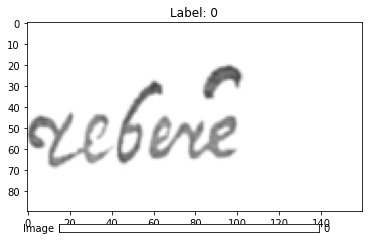

In [28]:
"""
.. module:: image_viewer
   :platform: Linux, Windows
   :synopsis: Example code for viewing the dataset in Assignment 3

.. moduleauthor:: Fredrik Nysjo
"""

from load_mnist import load_mnist_words, load_mnist_labels

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


# Load the image stack
images = load_mnist_words("Esposalles-bgr-images")
assert images is not None, "Could not load image stack"
n_images = images.shape[0]

# Load the label data
labels = load_mnist_labels("Esposalles-bgr-labels")
assert labels is not None, "Could not load labels"
n_labels = labels.shape[0]
assert n_images == n_labels

# Generate subsampled smaller version of the dataset
n_skip = 20
images_small = images[::n_skip]
labels_small = labels[::n_skip]

# Create lookup table with randomized colors for the unique labels. Feel free to
# change this if you prefer other colors!
np.random.seed(2345)
n_unique_labels = len(np.unique(labels))
color_lut = np.random.rand(n_unique_labels, 3) * 0.8 + 0.1

# Create a figure for inspecting the image and label data

plt.figure()
#plt.figure(figsize=(12, 12))
image_plot = plt.imshow(np.transpose(images[0,:,:]), cmap="gray", vmin=0, vmax=255)
label_text = plt.title("Label: " + str(int(labels[0])))

# Add a slider for scrolling through the dataset
slider_rect = plt.axes([0.20, 0.1, 0.60, 0.03])
slider = widgets.Slider(slider_rect, "Image", 0, n_images-1, valinit=0, valfmt="%d")
def slider_callback(val):
    label_text.set_text("Label: " + str(labels[int(val)]))
    image_plot.set_data(np.transpose(images[int(val),:,:]))
slider.on_changed(slider_callback)

plt.show()

In [21]:
transformer = PCA(n_components=2)
proj = transformer.fit_transform(np.array([x.flatten() for x in images_small]))

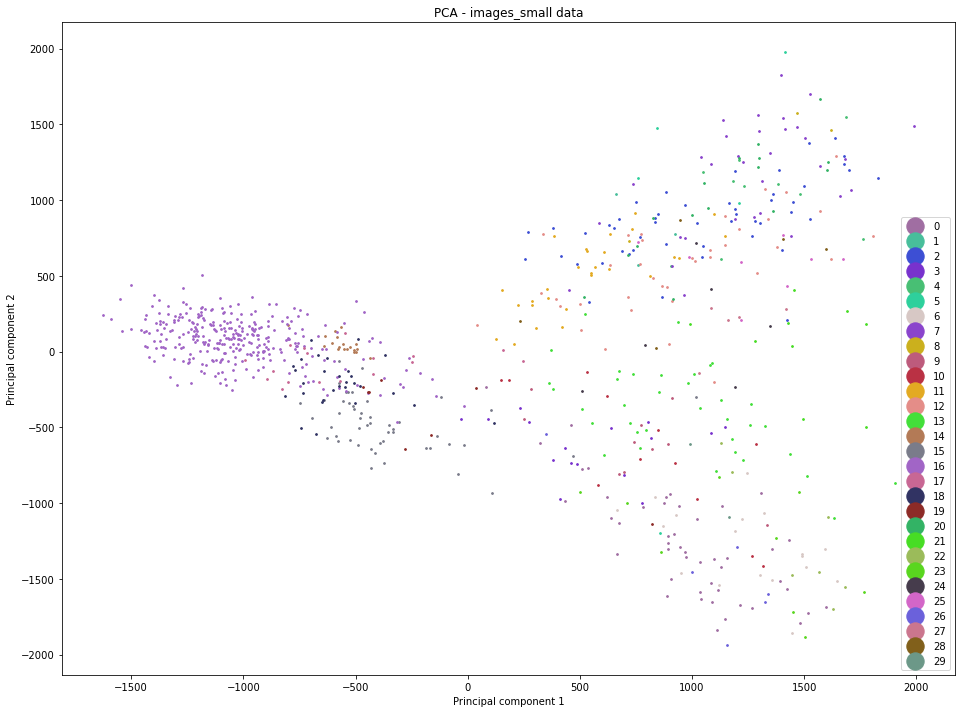

In [62]:
from matplotlib import cm
plt.figure(figsize=(16, 12))

for i in range(30):
    cluster = proj[labels_small == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], s=3, label=f"{np.unique(labels_small)[i]}",color=color_lut[i])
plt.legend(markerscale=10)
plt.title("PCA - images_small data")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()

In [4]:
# Questions to answer:

# What does the PCA projection on the smaller dataset look like? Does it seem to separate the labels well?
# Answer: No it does not seem to separate the labels well. Appart from (what looks to be) class 0 it seems the 
# this dimensionality reduction does not cluster the same classes together. 

# Part 2 - TSNE

In [56]:
from sklearn.manifold import TSNE



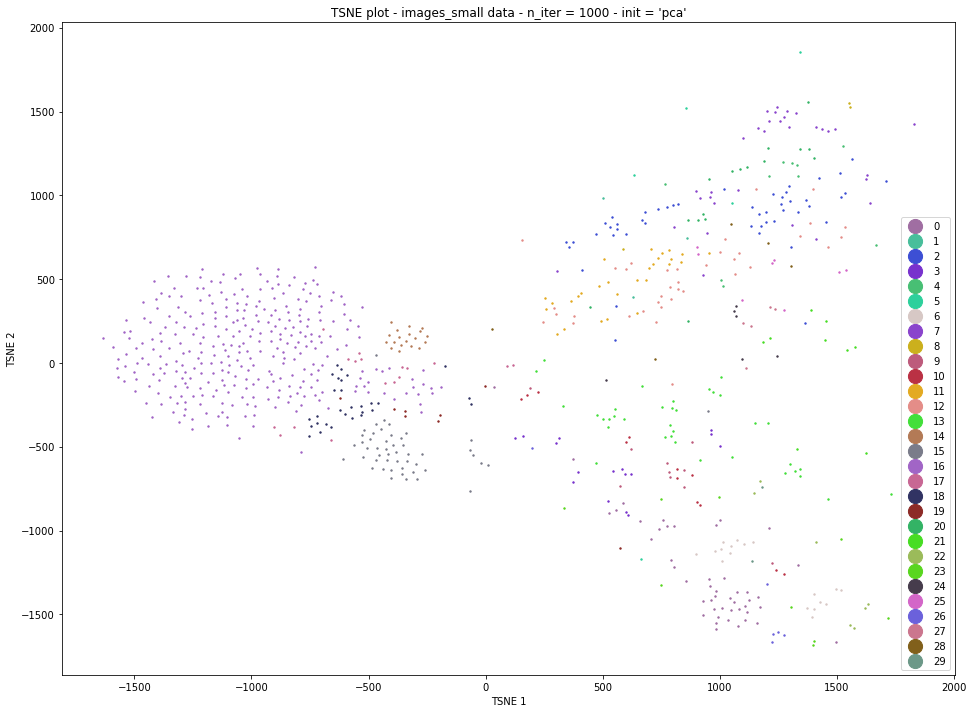

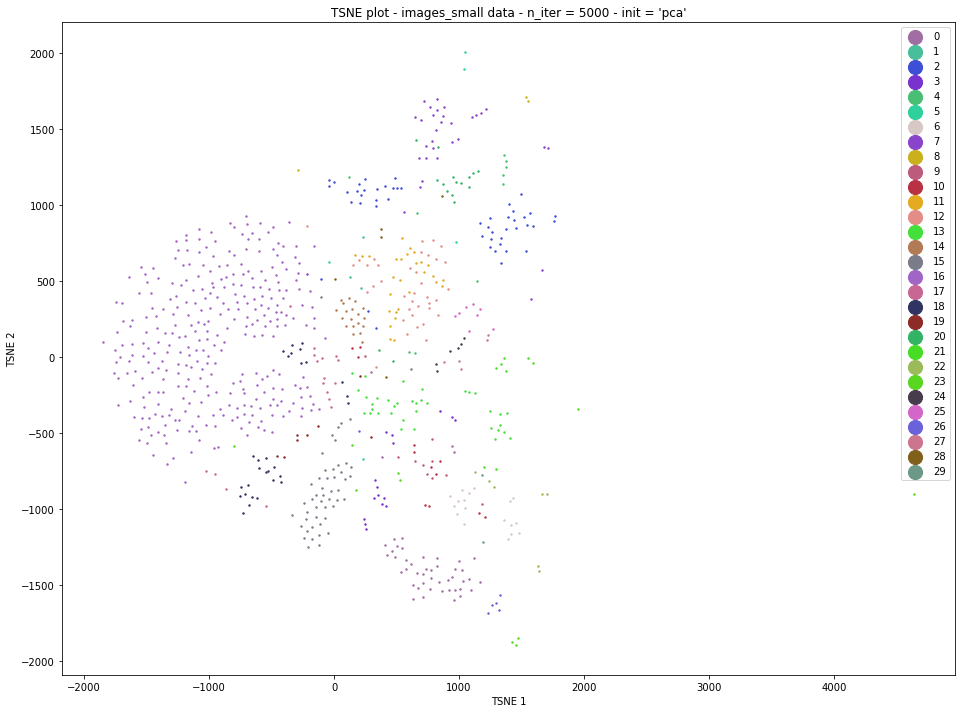

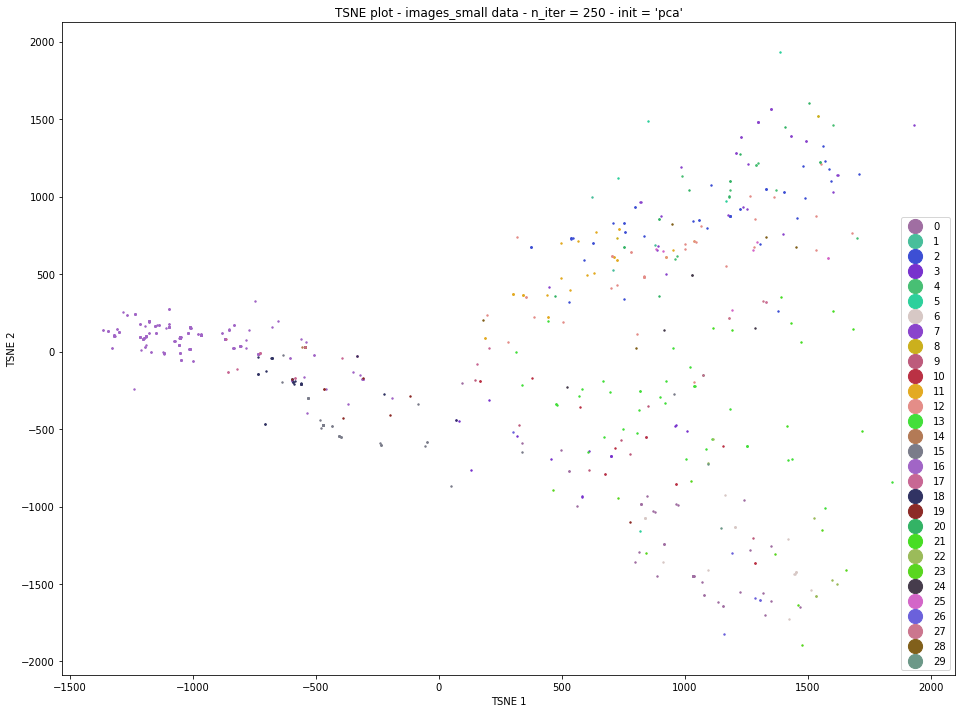

In [60]:
# TSNE for small data set with n_iter = 1000,5000 and 250
for n_iter in [1000,5000,250]:
    model = TSNE(n_components=2, random_state=42,init='pca',n_iter=n_iter)
    X_tsne = model.fit_transform(np.array([x.flatten() for x in images_small]))

    plt.figure(figsize=(16, 12))
    for i in range(30):
        cluster = X_tsne[labels_small == i]
        plt.scatter(cluster[:, 0], cluster[:, 1], s=2, label=f"{np.unique(labels_small)[i]}",color=color_lut[i])
    plt.title(f"TSNE plot - images_small data - n_iter = {n_iter} - init = 'pca'")
    plt.legend(markerscale=10)
    plt.xlabel("TSNE 1")
    plt.ylabel("TSNE 2")
    plt.show()

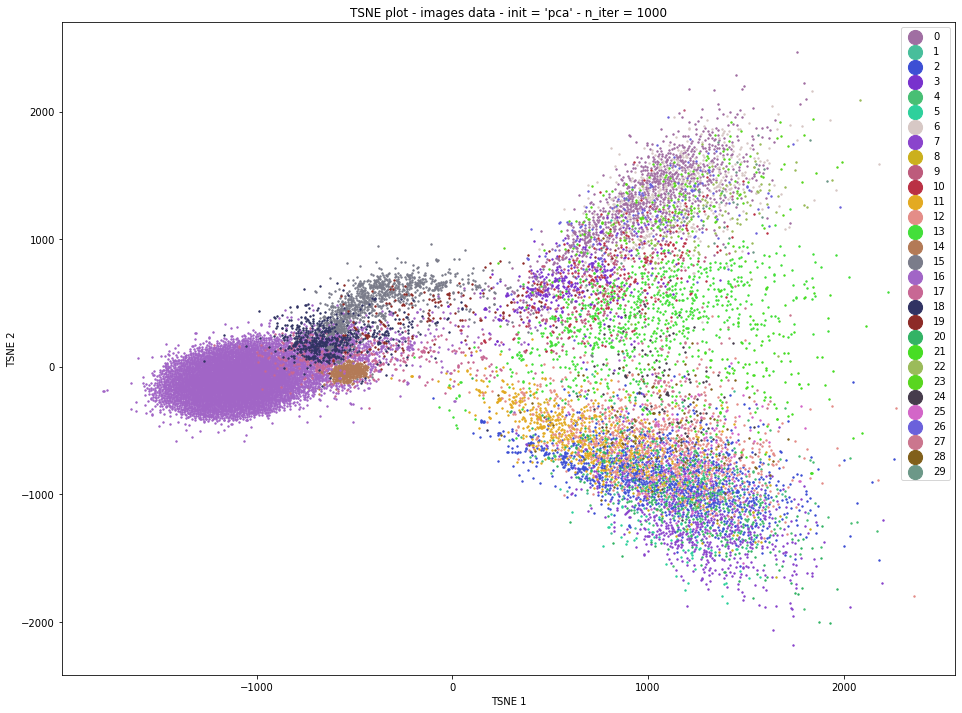

In [61]:
# TSNE with init='pca' and n_iter = 1000. All data
model = TSNE(n_components=2, random_state=42,init='pca',n_iter=1000)
X_tsne = model.fit_transform(np.array([x.flatten() for x in images]))

plt.figure(figsize=(16, 12))
for i in range(30):
    cluster = X_tsne[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], s=2, label=f"{np.unique(labels)[i]}",color=color_lut[i])
plt.title(f"TSNE plot - images data - init = 'pca' - n_iter = 1000")
plt.legend(markerscale=10)
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

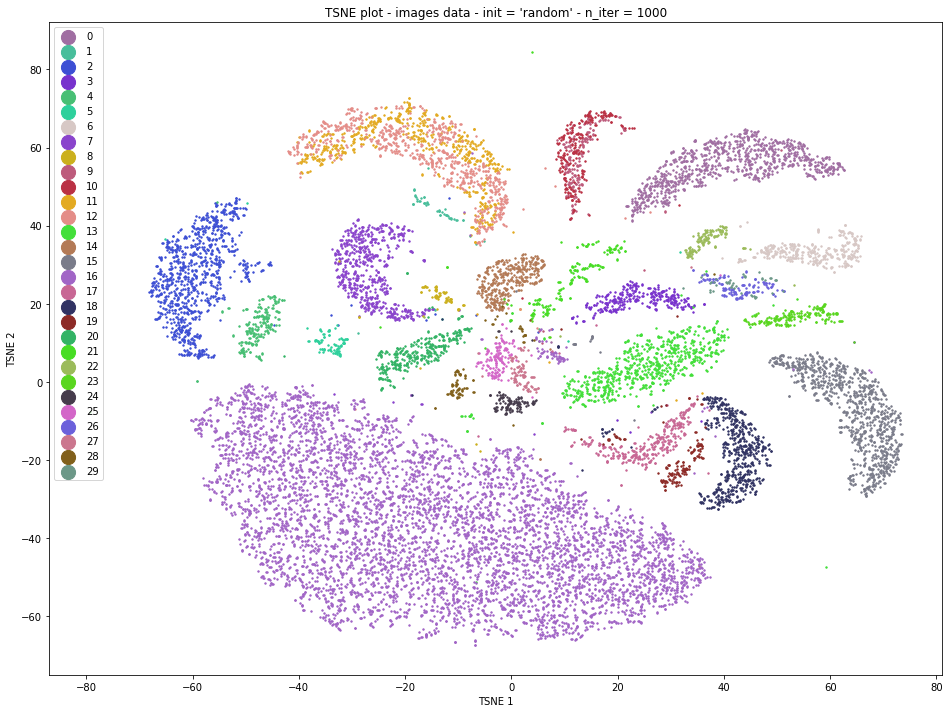

In [63]:
# TSNE with init='pca' and n_iter = 1000. All data
model = TSNE(n_components=2, random_state=42,init='random',n_iter=1000)
X_tsne = model.fit_transform(np.array([x.flatten() for x in images]))

plt.figure(figsize=(16, 12))
for i in range(30):
    cluster = X_tsne[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], s=2, label=f"{np.unique(labels)[i]}",color=color_lut[i])
plt.title(f"TSNE plot - images data - init = 'random' - n_iter = 1000")
plt.legend(markerscale=10)
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

In [ ]:
# Questions to answer:

# How does t-SNE seem to compare to PCA on the smaller dataset, when using PCA as starting guess and 1000 
# iterations for the method? What happens when you increase the number of iterations to 5000, and decrease it to 250?
# Answer: t-SNE with n_init = 1000 seems to perform better than PCA from part 1, although far from perfect it seems 
# to be slightly better in separating the clusters. When increasing n_init to 5000 the performance seems to improve as 
# the clusters become more separated. When decreasing n_init to 250 seems to make it worse compared to 1000.

# How does t-SNE perform on the full dataset with PCA as starting guess compared to random initialization, 
# for the same number of iterations (1000)?
# Answer: Random initialization is clearly much better at clustering together the classes when reducing the dimensions 


# Part 3 - UMAP

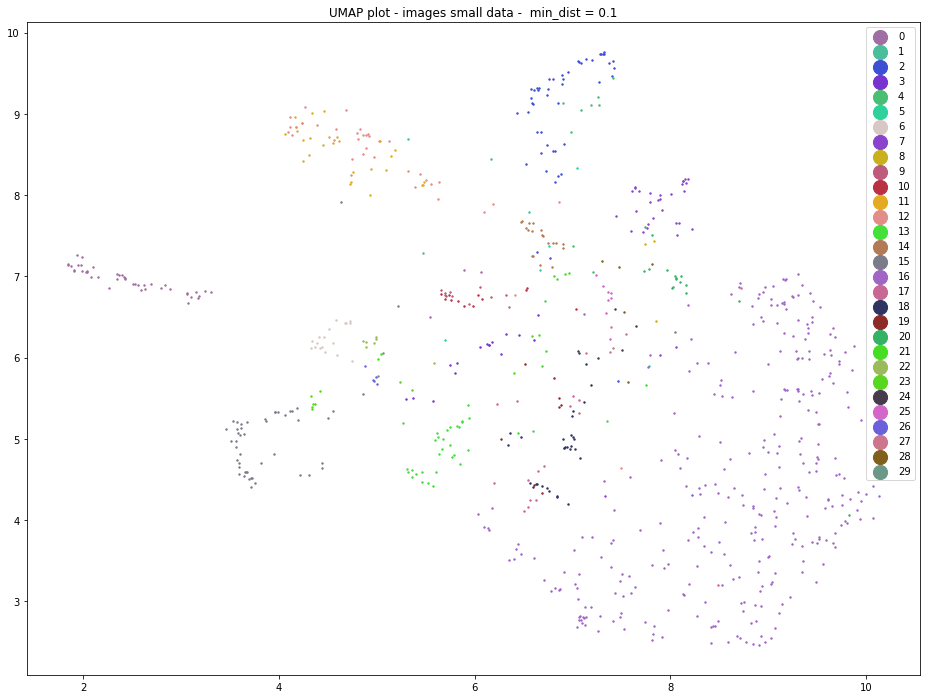

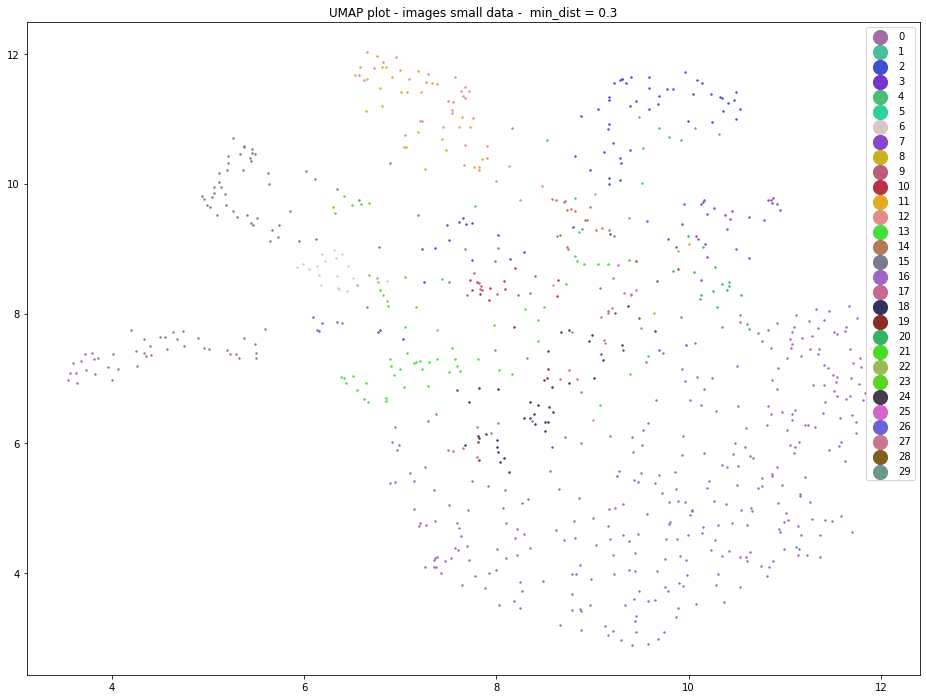

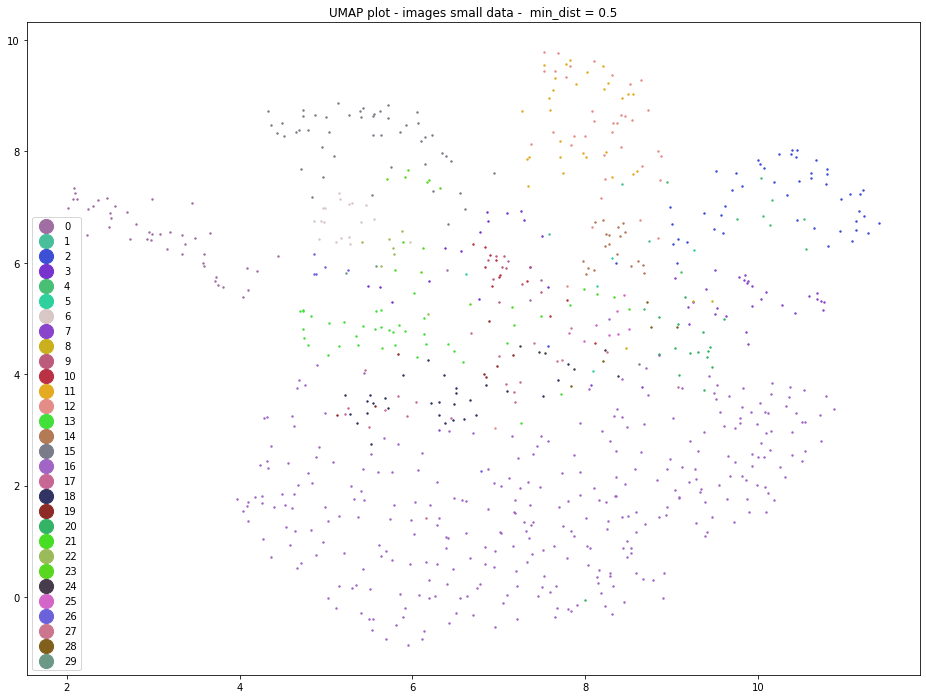

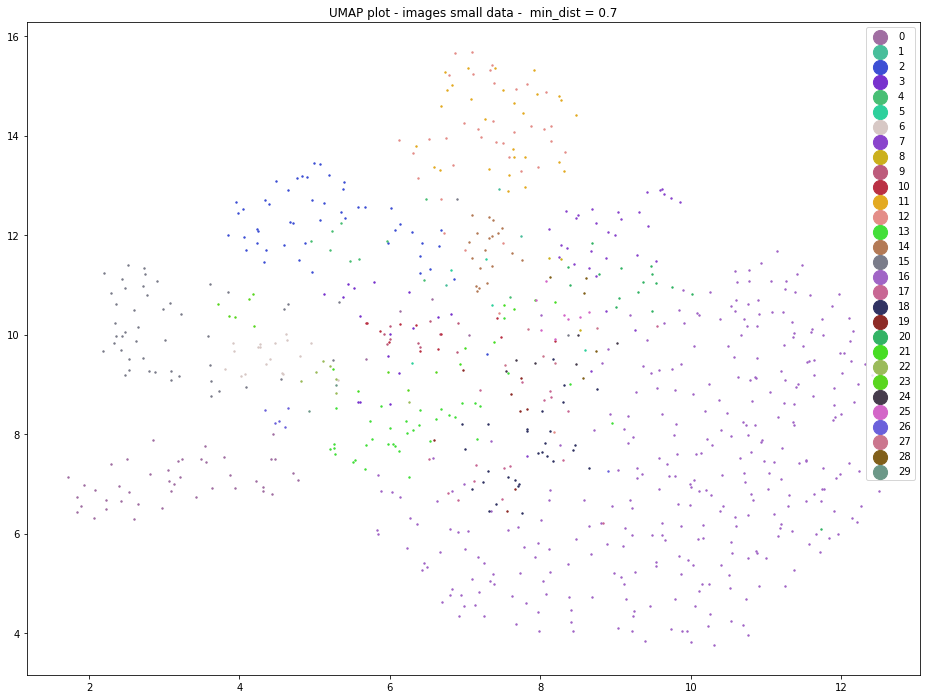

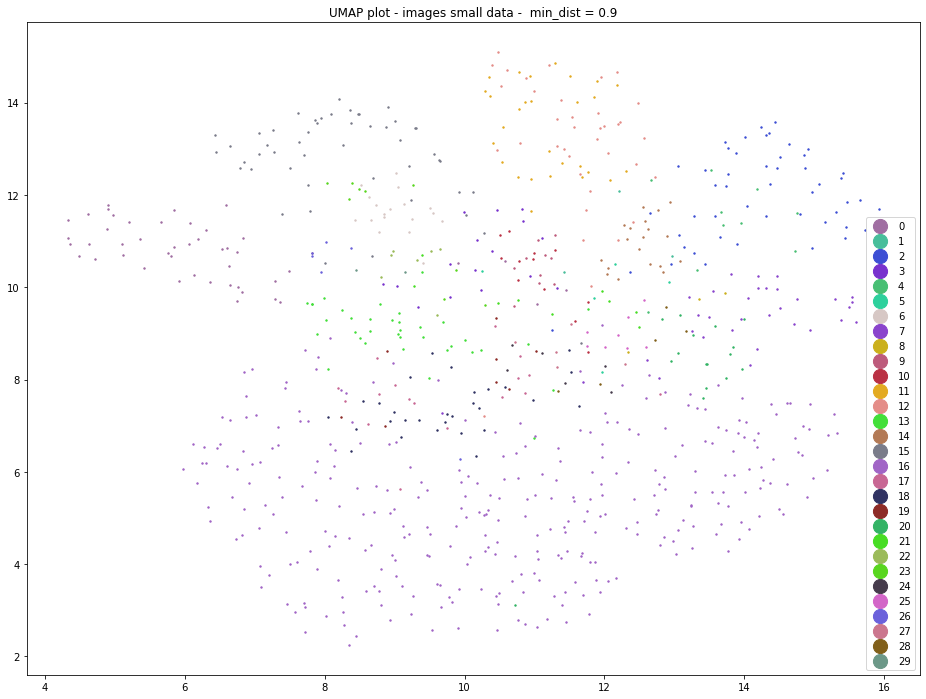

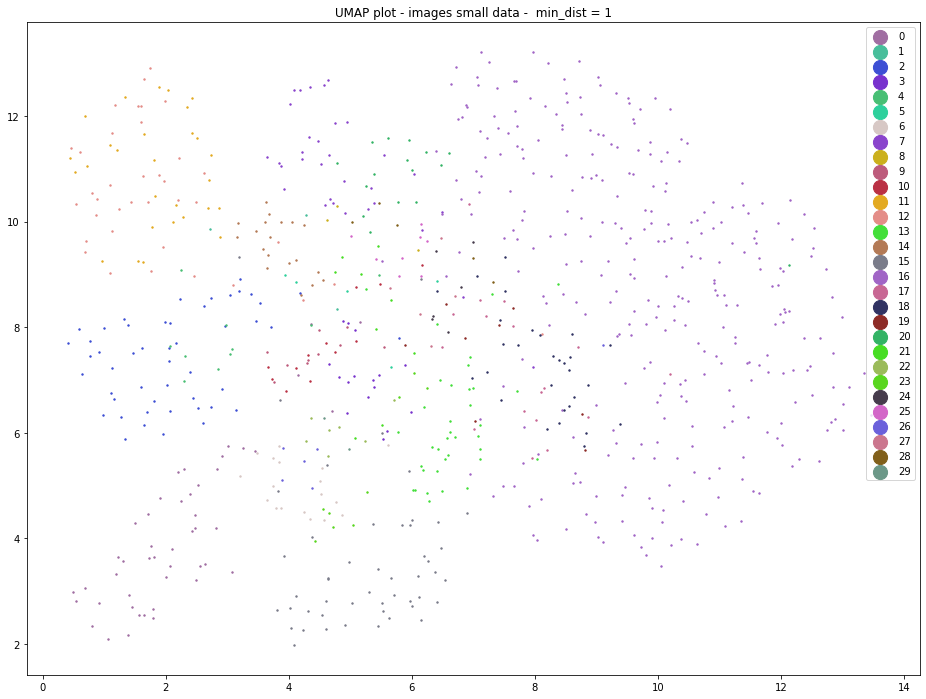

In [70]:
min_dist_lst = [0.1,0.3,0.5,0.7,0.9,1]
for min_dist in min_dist_lst:
    mapper = UMAP(min_dist=min_dist, random_state=1)
    X_umap = mapper.fit_transform(np.array([x.flatten() for x in images_small]))
    plt.figure(figsize=(16, 12))
    for i in range(30):
        cluster = X_umap[labels_small == i]
        plt.scatter(cluster[:, 0], cluster[:, 1], s=2, label=f"{np.unique(labels)[i]}",color=color_lut[i])
    plt.title(f"UMAP plot - images small data -  min_dist = {min_dist}")
    plt.legend(markerscale=10)
    #plt.xlabel(" 1")
    #plt.ylabel("TSNE 2")
    plt.show()

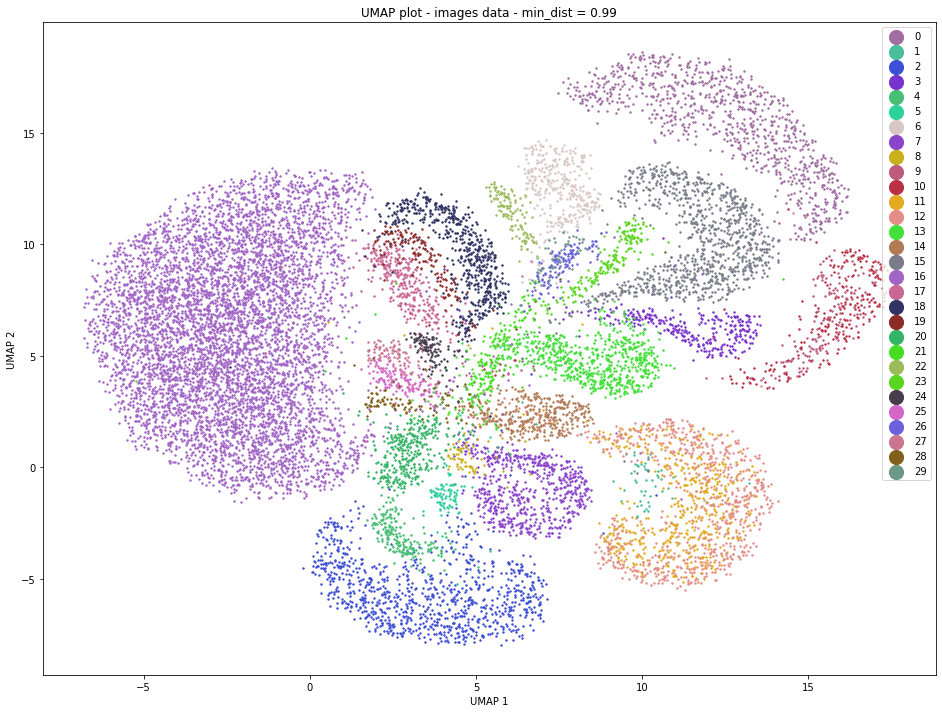

In [69]:
mapper = UMAP(min_dist=0.99,random_state=1)
X_umap = mapper.fit_transform(np.array([x.flatten() for x in images]))
plt.figure(figsize=(16, 12))
for i in range(30):
    cluster = X_umap[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], s=2, label=f"{np.unique(labels)[i]}",color=color_lut[i])
plt.title(f"UMAP plot - images data - min_dist = 0.99")
plt.legend(markerscale=10)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

In [ ]:
#Questions to answer:

# What seems to be a good value for min_dist for the smaller dataset?
# Asnwer: A lower number seems to be better, like min_dist = 0.1 

# Which of the two methods t-SNE or UMAP seems to provide the best separation of the word labels on the full 
# dataset? Can you find some example of two labels that both methods fail to separate?
# Answer: t-SNE seems to provide the best separations of the labels with when projected to 2 dimensions. 
# The following labels both methods had problems with separating:
# class 11 and 12
# class 9 and 10